# Model diagnostics

This section prepare plots of model diagnostics, including [summary of the parameters predictions and Rhat values (ESM 8)](../outputs/ESM_8.csv), [MCMC chains (ESM 7)](../outputs/ESM_7.pdf), plots for posterior distribution for model parameters [](),  [counterfactual plots (figur 4)](../outputs/Fig2.tiff), as well as [posterior check of predicted vs observed values (ESM 10)](../outputs/ESM_10.pdf).

In [ ]:
# Libraries
library(here)
library(rstan) # for reading the modle
library(ggplot2) # for plots
library(bayesplot) #for special plots
library(ggridges) # For plotting probability density
library(grid) # For plotting with ggplot and grid
library(gridExtra)# to arrange graphs next to each other


In [2]:
# Paths to inputs
path2models<-here("outputs","models")

# Paths to outputs
path2outputs<-here("outputs")

In [6]:
crops<-c("rice","millet","wheat","barley")

[1] "millet"


No divergences to plot.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



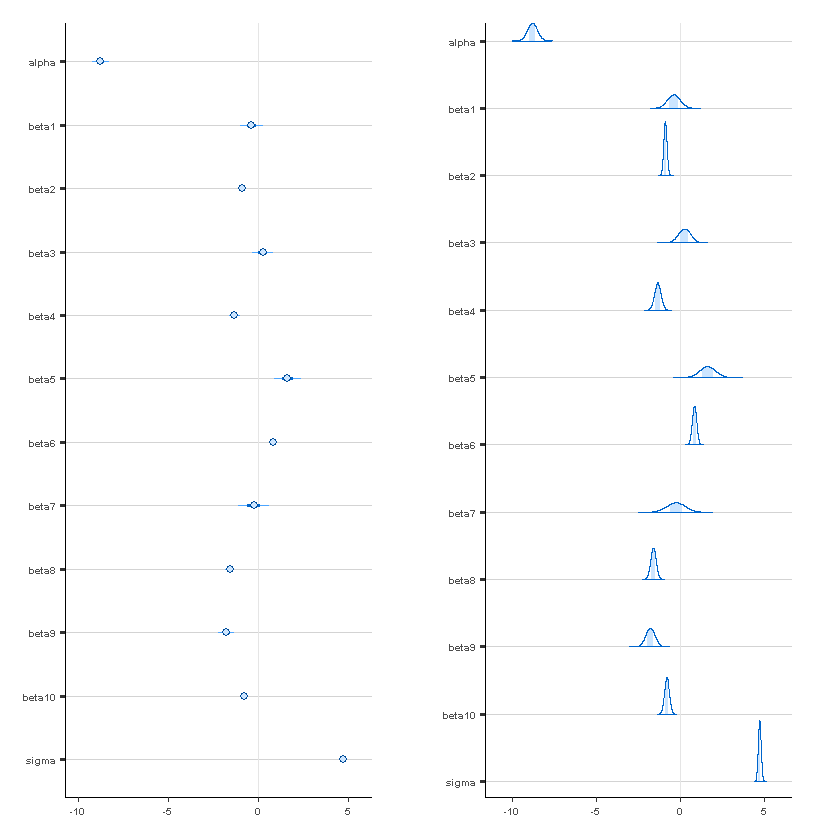

In [7]:
for (crop in crops){
    print(crop)
    # Set up
    
    # Define paths
    # Inputs
    path2model<-paste(path2models,"/",crop,".rds",sep="") # Model
    # Outputs:
    path2model_summary<-paste(path2outputs,"/",crop,"_model_summary",".csv",sep="")
    path2trace<-paste(path2outputs,"/",crop,"_traceplot.tiff",sep="")
    path2posterior<-paste(path2outputs,"/",crop,"_posterior.tiff",sep="")
    path2pairs<-paste(path2outputs,"/",crop,"_pairs_plot.tiff",sep="")
    # Load model
    fit<-readRDS(path2model)
    # Get np_cp parameters
    np_cp <- nuts_params(fit)
    
    ### Get model estimates with Rhat values
    model_summary<- summary(fit)
    model_summary<-as.data.frame(model_summary$summary) # turn into data frame
    head(model_summary) # Optionally show top of the model summary in jupyter
    write.csv(model_summary, file=path2model_summary, row.names=TRUE) # write to a file
    
    
    # Get traceplot
    # Set colour scheme
    color_scheme_set("blue")
    # Plot the chains
    traceplot<-mcmc_trace(fit, #number of warmup iterations to include
           regex_pars = c("alpha","beta","sigma"), #which parameters to show
           np = np_cp,
           facet_args=list(ncol=2)) + #options for how many plots to show per row
    theme(plot.margin = unit(c(1,1,0,0.5), "cm"),plot.title = element_text(hjust = 0.5),
       text = element_text(family = "sans"),panel.spacing = unit(0.5, "lines"),
       legend.key.size=(unit(1,"cm"))) + # defines the elements of the theme
    legend_move(position = "bottom")+ # moves legend to the bottom
    facet_text(family = "sans") + #defines the font of the text
    guides(color = guide_legend(override.aes = list(size = 0.75)))+ #override the legend size
    scale_x_continuous(limits = c(0,fit@stan_args[[1]]$iter-fit@stan_args[[1]]$warmup), expand = c(0, 0)) # zoom in on the limits of the x axis
    # Save the plot to a file
    width =6.85
    height = 9.21
    ggsave(path2trace,traceplot,width = width, height = height)
    
    # Plot parameters
    ### Plot parameter values with confidence intervals
    color_scheme_set("brightblue") # Set colour scheme
    # Prepare plot
    posterior_plot<-mcmc_intervals(fit,regex_pars = c("alpha","beta","sigma")) +
    theme(text = element_text(family = "sans"), # defines the font of the text
      axis.text=element_text(size=6),# defines the size of the axis labels
      panel.grid.major.y=element_line(color="lightgray",size=0.1),
      plot.margin = unit(c(0.5,1,0.5,0.5), "cm"),plot.title = element_text(hjust = 0.5,size=12))
    # Transform ggplot to grid table, to change the size of the data points
    posterior_plot <- ggplot_build(posterior_plot) # Builds the qtable from posterior plot
    posterior_plot$data[[3]]$size <- rep(1,length(posterior_plot$data[[3]]$size)) # This define the size of the quartile markers
    posterior_plot$data[[4]]$size <- rep(2,length(posterior_plot$data[[4]]$size)) # This defines the size of the median points
    posterior_plot <- ggplot_gtable(posterior_plot)
    ### Also plot the probability density for the parameters
    posterior_density<-mcmc_areas(fit,regex_pars = c("alpha","beta","sigma"),point_est ="none") +
    theme(text = element_text(family = "sans"), # defines the font of the text
      axis.text=element_text(size=6),# defines the size of the axis labels
      panel.grid.major.y=element_line(color="lightgray",size=0.1),
      plot.margin = unit(c(0.5,1,0.5,0.5), "cm"),plot.title = element_text(hjust = 0.5,size=12))+
      scale_y_discrete(expand = c(0.02, 0.02),limits = rev)+
      update_geom_defaults("ridgeline",list(size=0.1))+
      update_geom_defaults("segment",list(size=0.1))
    post<-grid.arrange(posterior_plot,posterior_density,ncol=2)
    #Save the plots
    width = 6.85
    height= 6.85/2
    ggsave(path2posterior,post,width = width, height = height, units = "cm", device='tiff',dpi=600,scale=2)
    
    # Pairs plot
    color_scheme_set("blue") # Change colour scheme
    pairs<-mcmc_pairs(fit, regex_pars = c("alpha","beta","sigma"),off_diag_args = list(size = 0.001),diag_fun="dens") # Plot pairs
    width = 17.4
    height= 17.4
    ggsave(path2pairs,pairs,width = width, height = height, units = "cm",device='tiff',dpi=600,scale=4)
    
    
}

